# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559700 sha256=a303dbb6dcb50ee62884aa412161eecbde1a6bf8ac19dbcbb157efab2cc55357
  Stored in directory: c:\users\sathya darapu\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy


In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from configWeather import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities


['barrow',
 'rikitea',
 'belushya guba',
 'taolanaro',
 'fortuna',
 'skagastrond',
 'burica',
 'punta arenas',
 'komsomolskiy',
 'arua',
 'cape town',
 'albany',
 'pitkyaranta',
 'faanui',
 'hobart',
 'oum hadjer',
 'mindelo',
 'vaini',
 'qasigiannguit',
 'saskylakh',
 'avarua',
 'yellowknife',
 'salalah',
 'katherine',
 'norman wells',
 'tilichiki',
 'kapaa',
 'bluff',
 'lumut',
 'aripuana',
 'nemuro',
 'ixtapa',
 'jumla',
 'airai',
 'belyy yar',
 'hilo',
 'natal',
 'sistranda',
 'hithadhoo',
 'port alfred',
 'gillette',
 'afmadu',
 'ushuaia',
 'mataura',
 'port augusta',
 'borlange',
 'puerto ayora',
 'port hardy',
 'plainfield',
 'bredasdorp',
 'hermanus',
 'adrar',
 'castro',
 'vardo',
 'saint-philippe',
 'dikson',
 'olinda',
 'padang',
 'amderma',
 'saint george',
 'saint-leu',
 'sao joao da barra',
 'tuktoyaktuk',
 'cabo san lucas',
 'atherton',
 'pilar de la horadada',
 'san matias',
 'sabile',
 'lebu',
 'shimanovsk',
 'ancud',
 'avera',
 'honiara',
 'bathsheba',
 'makakilo city

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
url = url + "appid=" + api_key
print(url)
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=a0552112d624bc557009bca3634da143
Beginning Data Retrieval     
-----------------------------


In [4]:
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(' ', "%20")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | skagastrond
City not found. Skipping...
Processing Record 7 of Set 1 | burica
City not found. Skipping...
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | komsomolskiy
Processing Record 10 of Set 1 | arua
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | pitkyaranta
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | oum hadjer
Processing Record 17 of Set 1 | mindelo
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | qasigiannguit
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1

Processing Record 37 of Set 4 | kamyshlov
Processing Record 38 of Set 4 | alotau
City not found. Skipping...
Processing Record 39 of Set 4 | mpongwe
Processing Record 40 of Set 4 | clyde river
Processing Record 41 of Set 4 | caborca
Processing Record 42 of Set 4 | san jeronimo
Processing Record 43 of Set 4 | awjilah
Processing Record 44 of Set 4 | lavrentiya
Processing Record 45 of Set 4 | thana
Processing Record 46 of Set 4 | new norfolk
Processing Record 47 of Set 4 | hofn
Processing Record 48 of Set 4 | khandyga
Processing Record 49 of Set 4 | mar del plata
Processing Record 0 of Set 5 | codrington
Processing Record 1 of Set 5 | abu samrah
Processing Record 2 of Set 5 | lata
Processing Record 3 of Set 5 | scottsburgh
City not found. Skipping...
Processing Record 4 of Set 5 | tidore
City not found. Skipping...
Processing Record 5 of Set 5 | hualmay
Processing Record 6 of Set 5 | orange walk
Processing Record 7 of Set 5 | gat
Processing Record 8 of Set 5 | puerto baquerizo moreno
Proc

Processing Record 26 of Set 8 | pacific grove
Processing Record 27 of Set 8 | korem
Processing Record 28 of Set 8 | kushmurun
Processing Record 29 of Set 8 | sucre
Processing Record 30 of Set 8 | novikovo
Processing Record 31 of Set 8 | wanning
Processing Record 32 of Set 8 | fort nelson
Processing Record 33 of Set 8 | saleaula
City not found. Skipping...
Processing Record 34 of Set 8 | fukue
Processing Record 35 of Set 8 | atar
Processing Record 36 of Set 8 | asau
Processing Record 37 of Set 8 | thinadhoo
Processing Record 38 of Set 8 | xinzhou
Processing Record 39 of Set 8 | yei
Processing Record 40 of Set 8 | chapais
Processing Record 41 of Set 8 | sampang
Processing Record 42 of Set 8 | yar-sale
Processing Record 43 of Set 8 | pringsewu
Processing Record 44 of Set 8 | oranjestad
Processing Record 45 of Set 8 | anadyr
Processing Record 46 of Set 8 | krasnoarmeysk
Processing Record 47 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 48 of Set 8 | vigrestad
Process

Processing Record 18 of Set 12 | isiro
Processing Record 19 of Set 12 | mareeba
Processing Record 20 of Set 12 | sungaipenuh
Processing Record 21 of Set 12 | kununurra
Processing Record 22 of Set 12 | dalvik
Processing Record 23 of Set 12 | aloleng
Processing Record 24 of Set 12 | westport
Processing Record 25 of Set 12 | dicabisagan
Processing Record 26 of Set 12 | gornja radgona
Processing Record 27 of Set 12 | okha
Processing Record 28 of Set 12 | vanimo
Processing Record 29 of Set 12 | thanh hoa
Processing Record 30 of Set 12 | sao jose da coroa grande
Processing Record 31 of Set 12 | hirara
Processing Record 32 of Set 12 | ambatofinandrahana
Processing Record 33 of Set 12 | aden
Processing Record 34 of Set 12 | honningsvag
Processing Record 35 of Set 12 | nyurba
Processing Record 36 of Set 12 | saint-pierre
Processing Record 37 of Set 12 | podor
Processing Record 38 of Set 12 | babol
Processing Record 39 of Set 12 | keti bandar
Processing Record 40 of Set 12 | emerald
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [9]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,35.62,75,40,23.02,US,1629123544
1,rikitea,-23.1203,-134.9692,74.26,75,0,11.32,PF,1629123009
2,fortuna,40.5982,-124.1573,62.42,69,90,1.01,US,1629123136
3,punta arenas,-53.1500,-70.9167,41.11,100,0,9.22,CL,1629122996
4,komsomolskiy,40.4272,71.7189,81.32,21,0,6.91,UZ,1629123113


Example code

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [10]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,19.767965,17.669333,71.715954,68.408200,56.333333,8.040963,1.629124e+09
std,32.461554,88.058673,14.708567,22.747587,39.304731,5.589117,1.788867e+02
min,-54.800000,-179.166700,31.240000,6.000000,0.000000,0.000000,1.629123e+09
25%,-6.836700,-60.700000,62.550000,58.000000,16.000000,3.710000,1.629123e+09
50%,21.016700,21.560600,74.260000,74.000000,71.000000,6.910000,1.629124e+09
75%,46.433300,96.128500,81.500000,85.000000,97.000000,11.500000,1.629124e+09
max,78.218600,178.416700,115.430000,100.000000,100.000000,31.030000,1.629124e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
city_data_pd[city_data_pd['Humidity'] > 100]
#no cities with humididty > 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

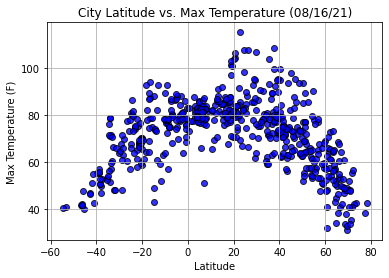

In [14]:

# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", color = "blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Fig1.png")
# Show plot
plt.show()

The plot shows that there are higher temperatures closer to the equator (0 degrees latitude)
Also, the plot indicates the temperatures can reach over 100 degrees in the latitudes range of 20 to 40
Coldest regions are at the north pole where temperatures < 40 degrees.

## Latitude vs. Humidity Plot

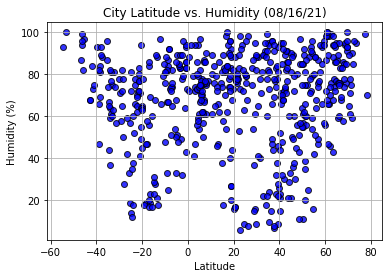

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", color ="blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

Looks like humidity is always higher near the poles. Humidity is greater than 40% between 0 - 10 latitude.

## Latitude vs. Cloudiness Plot

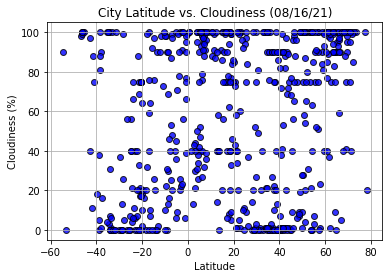

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", color = "blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

Most of the datapoints tend to be near 0 or 100% so it could be concluded that the regions are accounted for either as Mostly cloudy(100%) or Mostly not (0%). 

## Latitude vs. Wind Speed Plot

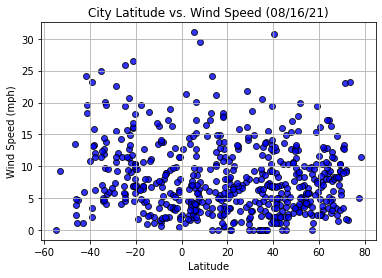

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", color ="blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

Windspead is higher closer to the equator. Northern hemisphere can see more wind.

## Linear Regression

In [21]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data_pd.loc[pd.to_numeric(city_data_pd["Lat"]).astype(float) > 0, :]
southern_df = city_data_pd.loc[pd.to_numeric(city_data_pd["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.5x + 91.36
The r-value is: -0.6770966545246782
The regression displays a negative correlation.
In the northern hemisphere, as you move away from the equator the temperature decreases.


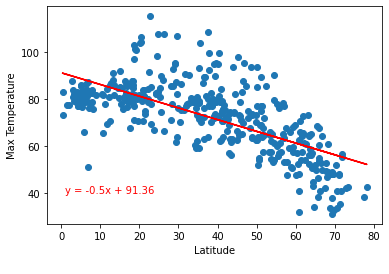

In [34]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.text(1,40,line_eq,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')


print(f"The r-value is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the northern hemisphere, as you move away from the equator the temperature decreases.")

# Save the figure
plt.savefig("Fig5.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.7x + 83.67
The r-value is: 0.7079265150048398
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


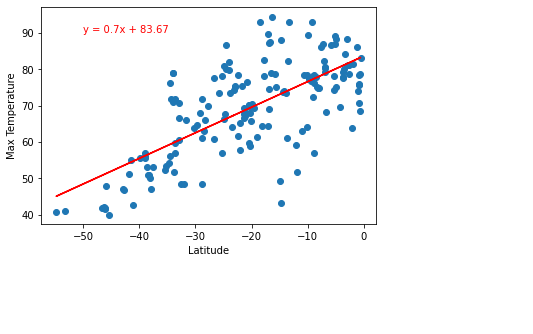

In [37]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.text(-50,90,line_eq,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')


print(f"The r-value is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")

# Save the figure
plt.savefig("Fig6.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.09x + 66.25
The r-value is: 0.08033127111363185
Not much of a correlation.


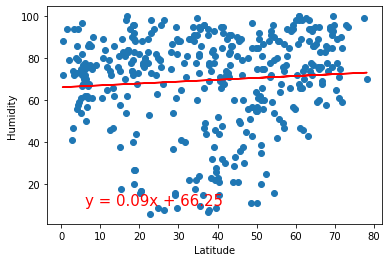

In [39]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')


print(f"The r-value is: {rvalue}")
print("Not much of a correlation.")

# Save the figure
plt.savefig("Fig7.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.19x + 61.89
The r-value is: -0.11079176875189314
Not much of a correlation.


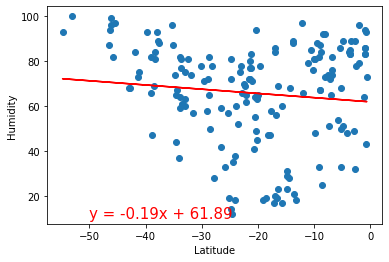

In [41]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')


print(f"The r-value is: {rvalue}")
print("Not much of a correlation.")

# Save the figure
plt.savefig("Fig8.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.17x + 54.68
The r-value is: 0.09271906492960853
Not much of a correlation.


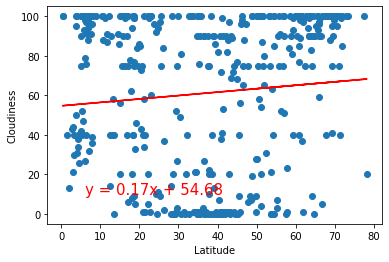

In [42]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


print(f"The r-value is: {rvalue}")
print("Not much of a correlation.")

# Save the figure
plt.savefig("Fig9.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.25x + 50.45
The r-value is: 0.08639002092680738
Not much of a correlation.


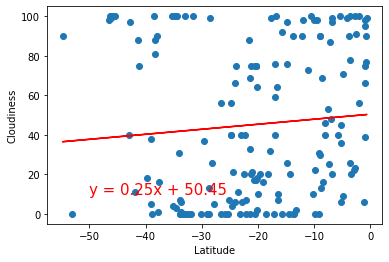

In [43]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


print(f"The r-value is: {rvalue}")
print("Not much of a correlation.")

# Save the figure
plt.savefig("Fig10.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.0x + 7.49
The r-value is: 0.009931706073479134
Not much of a correlation.


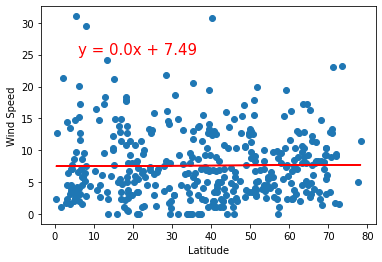

In [45]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


print(f"The r-value is: {rvalue}")
print("Not much of a correlation.")

# Save the figure
plt.savefig("Fig11.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.09x + 7.33
The r-value is: -0.19392845406856796
Not much of a correlation.


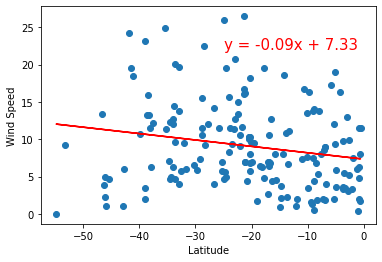

In [48]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,22),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


print(f"The r-value is: {rvalue}")
print("Not much of a correlation.")

# Save the figure
plt.savefig("Fig12.png")

plt.show()